In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

from ophyd.hkl.diffract import E4CH
from ophyd.hkl.calc import (CalcRecip, CalcE4CH, CalcK6C)

/home/klauer/ramdisk/mc/envs/ophyd0/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Load the desired HKL trajectory

In [2]:
hkls = pd.read_csv('hkl_data/hkl.txt', delim_whitespace=True)
hkls.keys()

Index(['h', 'k', 'l'], dtype='object')

## Get the motor positions that SPEC calculated

In [3]:
# The motor positions according to SPEC
spec_motors = pd.read_csv('hkl_data/motors.txt', delim_whitespace=True)
spec_motors.keys()

Index(['Delta', 'Theta', 'Chi', 'Phi', 'Mu', 'Gamma'], dtype='object')

## Plot the trajectory of the physical motors

<IPython.core.display.Javascript object>


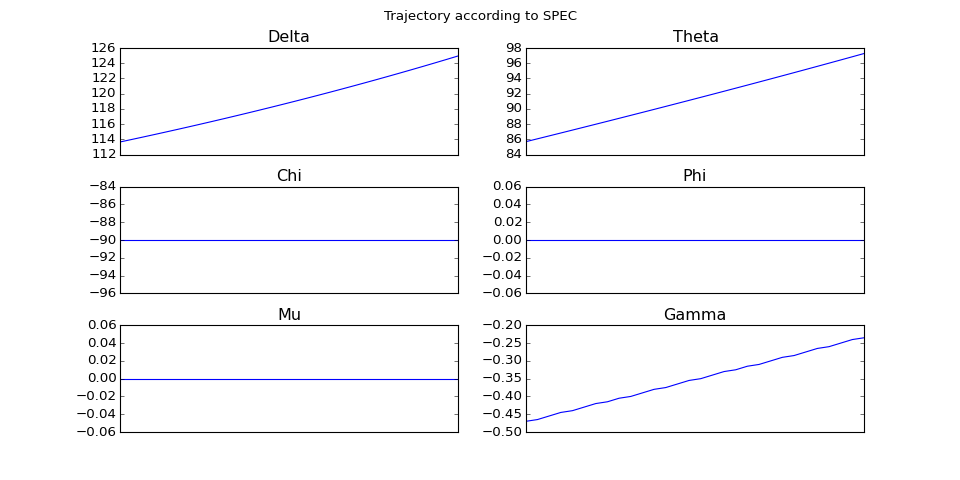

In [4]:
fig, axes = plt.subplots(3, 2, figsize=(12, 6),
                         subplot_kw={'xticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.2)

plt.suptitle('Trajectory according to SPEC')
for ax, key in zip(axes.flat, spec_motors.keys()):
    ax.plot(spec_motors.index, spec_motors[key], label=key)
    ax.set_title(key)
plt.show()

## Plot the desired HKL trajectory

<IPython.core.display.Javascript object>


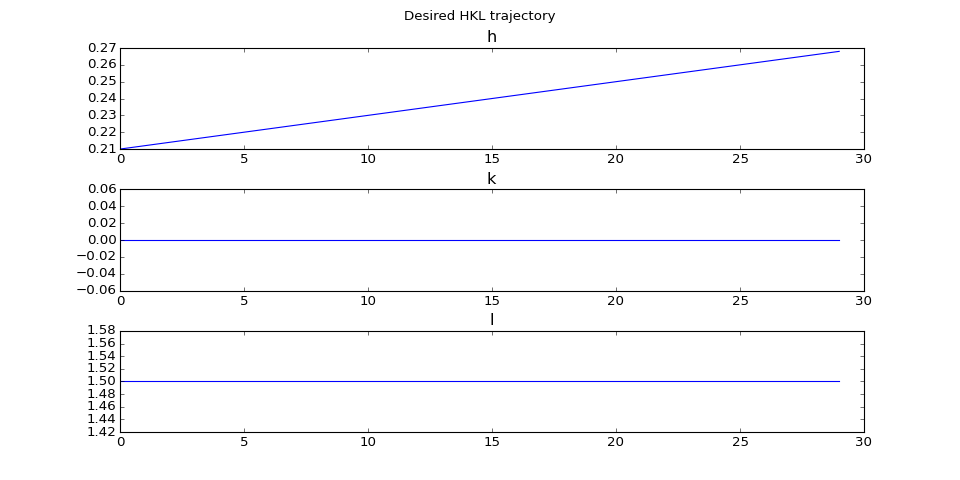

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(12, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.suptitle('Desired HKL trajectory')
axes[0].plot(hkls.h)
axes[0].set_title('h')
axes[1].plot(hkls.k)
axes[1].set_title('k')
axes[2].plot(hkls.l)
axes[2].set_title('l')
plt.show()

## Initialize a calculation engine

In [6]:
calc = CalcE4CH(engine='hkl')
print('physical axes', calc.physical_axes)
print('pseudo axes', calc.pseudo_axes)

physical axes OrderedDict([('omega', 0.0), ('chi', 0.0), ('phi', 0.0), ('tth', 0.0)])
pseudo axes OrderedDict([('h', 0.0), ('k', 0.0), ('l', 0.0)])


In [7]:
# from ophyd.hkl.sample import HklSample
# new_sample supports kwargs (see `help(HklSample)`)
sample = calc.new_sample('sample0')

In [8]:
# add the primary reflection
sample.add_reflection(0, 0, 2)

In [9]:
# and the secondary reflection
sample.add_reflection(1, 0, 1)

In [10]:
sample.UB

array([[  4.07999046e+00,  -2.49827363e-16,  -2.49827363e-16],
       [  0.00000000e+00,   4.07999046e+00,  -2.49827363e-16],
       [  0.00000000e+00,   0.00000000e+00,   4.07999046e+00]])

In [11]:
sample.lattice = (3.78, 3.78, 13.28, 90, 90, 90)

In [12]:
from gi.repository import Hkl as GiHkl


In [13]:
GiHkl.Lattice.new?